In [48]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

plt.style.use('ggplot')
pd.set_option('display.max_colwidth', 50)

import nltk
from nltk import word_tokenize

In [2]:
df = pd.read_csv('MachineLearning_reddit.csv')

In [7]:
df.head()

,title,score,id,subreddit,url,num_comments,body,created,timestamp
0,[D] Simple Questions Thread,14,qorekl,MachineLearning,https://www.reddit.com/r/MachineLearning/comme...,54,Please post your questions here instead of cre...,1.636301e+09,2021-11-07 17:00:18
6,Walk-Forward Target Encoding and Data Leakage [D],3,qtiqlw,MachineLearning,https://www.reddit.com/r/MachineLearning/comme...,1,Hi!\n\nI am working on a time series problem w...,1.636867e+09,2021-11-14 06:15:27
7,[N] Introduction to Data Science book updated,0,qtlmql,MachineLearning,https://www.reddit.com/r/MachineLearning/comme...,0,"Hello All,\n\nI have updated my ongoing Data S...",1.636879e+09,2021-11-14 09:39:13
9,[D] Analysis of ICLR 2022 Review Scores,24,qszmuu,MachineLearning,https://www.reddit.com/r/MachineLearning/comme...,1,We analysed the relationship between ICLR 2022...,1.636804e+09,2021-11-13 12:45:06
10,[P] Lyric Studio - Artificial Intelligence Son...,1,qtik3a,MachineLearning,https://www.reddit.com/r/MachineLearning/comme...,0,I created this demo in two days (last weekend)...,1.636866e+09,2021-11-14 06:04:08


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469 entries, 0 to 468
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         469 non-null    object 
 1   score         469 non-null    int64  
 2   id            469 non-null    object 
 3   subreddit     469 non-null    object 
 4   url           469 non-null    object 
 5   num_comments  469 non-null    int64  
 6   body          387 non-null    object 
 7   created       469 non-null    float64
 8   timestamp     469 non-null    object 
dtypes: float64(1), int64(2), object(6)
memory usage: 33.1+ KB


In [5]:
df.dropna(inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 387 entries, 0 to 466
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         387 non-null    object 
 1   score         387 non-null    int64  
 2   id            387 non-null    object 
 3   subreddit     387 non-null    object 
 4   url           387 non-null    object 
 5   num_comments  387 non-null    int64  
 6   body          387 non-null    object 
 7   created       387 non-null    float64
 8   timestamp     387 non-null    object 
dtypes: float64(1), int64(2), object(6)
memory usage: 30.2+ KB


In [8]:
df.describe()

,score,num_comments,created
count,387.000000,387.000000,3.870000e+02
mean,33.932817,12.524548,1.635758e+09
std,79.166714,24.979397,6.806483e+05
min,0.000000,0.000000,1.634506e+09
25%,1.000000,1.000000,1.635216e+09
50%,5.000000,4.000000,1.635779e+09
75%,23.000000,10.000000,1.636386e+09
max,662.000000,211.000000,1.636879e+09


In [16]:
max_comm = df.loc[df['num_comments'] == 211, 'body'].str.cat(sep='\n')
print(max_comm)

Zillow announced that they are [laying off a quarter of their workforce](https://www.cbsnews.com/news/zillow-layoffs-closing-zillow-offers-selling-homes/) due to a $420 million loss incurred by Zillow Offers, the home flipping arm of their business. The business model was reliant on [Zestimate](https://www.zillow.com/z/zestimate/), a neural network-based model that forecasts housing prices.

This seems like a colossal misstep on their part. It begs the question, how can other companies avoid a similar fate if they are making large gambles based on machine learning models predicting market movements? Additionally, how much should consumers rely on market predictions like Zestimate when making financial decisions (speaking as someone who recently bought a home and researched the market on Zillow during the process)?


In [19]:
df.shape

(387, 9)

<Axes: ylabel='Frequency'>

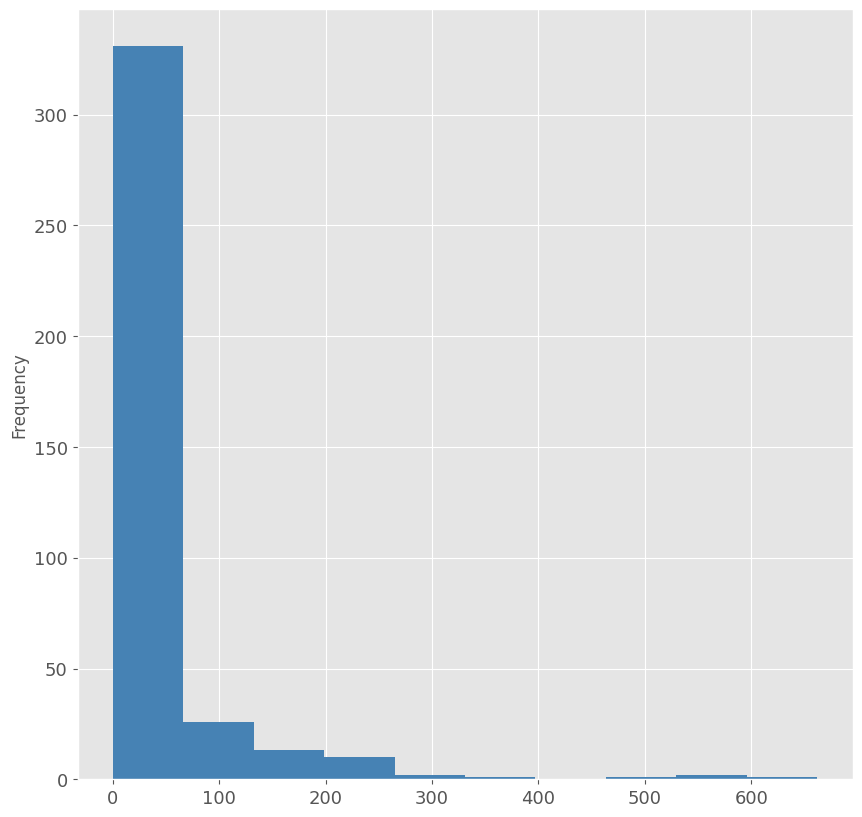

In [26]:
df['score'].sort_index().plot(kind='hist', figsize=(10,10), color='steelblue', fontsize=13)


<Axes: ylabel='Frequency'>

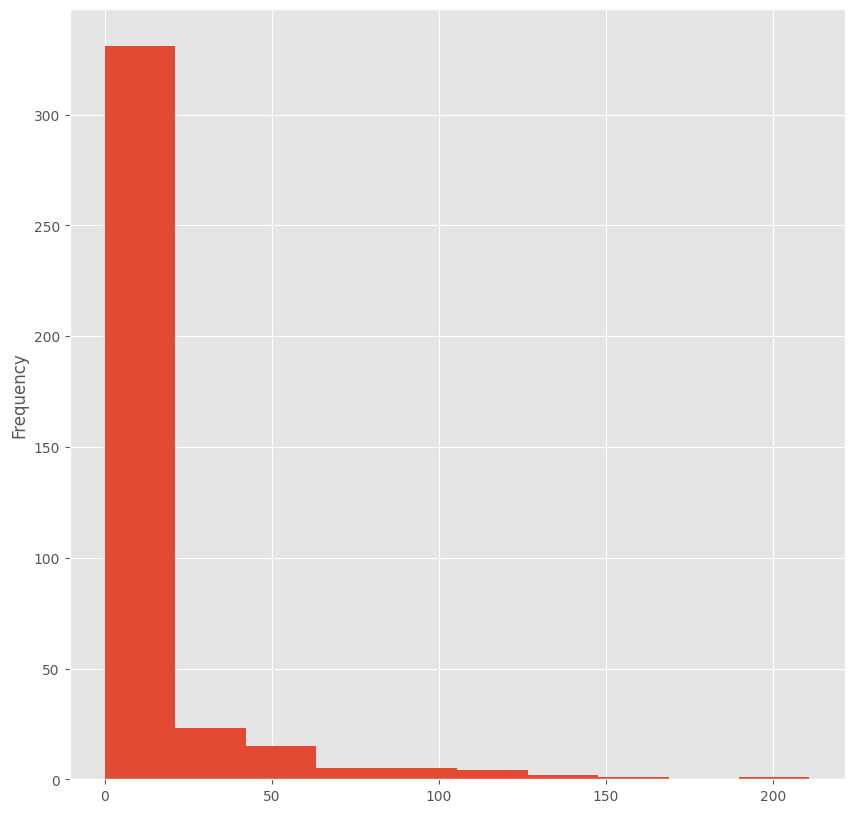

In [27]:
df['num_comments'].sort_index().plot(kind = 'hist', figsize = (10,10))

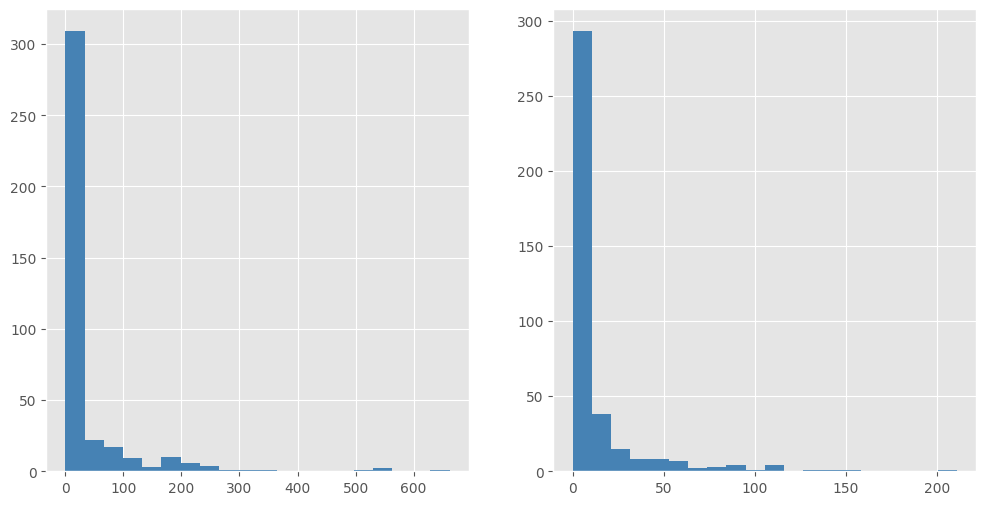

In [41]:
plt.figure(figsize = (12,6))

plt.subplot(1,2,1)

# df['score'].sort_index().plot(kind='hist', figsize=(10,10), color='steelblue', fontsize=13)
plt.hist(df['score'], bins = 20, color = 'steelblue')

plt.subplot(1,2,2)

# df['num_comments'].sort_index().plot(kind = 'hist', figsize = (10,10))
plt.hist(df['num_comments'], bins = 20, color = 'steelblue')
plt.show()

In [51]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\filsz\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [59]:
from nltk.tokenize import sent_tokenize
sentences = sent_tokenize(df['body'].str.cat(sep='\n'))
for i in sentences:
    print(i)
    print('\n')

Please post your questions here instead of creating a new thread.


Encourage others who create new posts for questions to post here instead!


Thread will stay alive until next one so keep posting after the date in the title.


Thanks to everyone for answering questions in the previous thread!


Hi!


I am working on a time series problem where I need to also test historical predictions through time (using a walk-forward procedure).


There is a "data leakage" when dealing with time series and using simple target encoding features like :

df.groupby(col)\[target\].transform('mean').


&#x200B;

I am wondering if anyone has built a custom function to build these target encoding features without leaking data... Kind of like a walk-forward target encoding function...
Hello All,

I have updated my ongoing Data Science book.


The following sections were added:

1, [Vectors](https://datascience-book.gitlab.io/book.html#_vectors)

2.


[Matrices](https://datascience-book.gitlab.io/book.html

In [53]:
tokens = nltk.word_tokenize(df['body'].str.cat(sep='\n'))
print(tokens)

['Please', 'post', 'your', 'questions', 'here', 'instead', 'of', 'creating', 'a', 'new', 'thread', '.', 'Encourage', 'others', 'who', 'create', 'new', 'posts', 'for', 'questions', 'to', 'post', 'here', 'instead', '!', 'Thread', 'will', 'stay', 'alive', 'until', 'next', 'one', 'so', 'keep', 'posting', 'after', 'the', 'date', 'in', 'the', 'title', '.', 'Thanks', 'to', 'everyone', 'for', 'answering', 'questions', 'in', 'the', 'previous', 'thread', '!', 'Hi', '!', 'I', 'am', 'working', 'on', 'a', 'time', 'series', 'problem', 'where', 'I', 'need', 'to', 'also', 'test', 'historical', 'predictions', 'through', 'time', '(', 'using', 'a', 'walk-forward', 'procedure', ')', '.', 'There', 'is', 'a', '``', 'data', 'leakage', "''", 'when', 'dealing', 'with', 'time', 'series', 'and', 'using', 'simple', 'target', 'encoding', 'features', 'like', ':', 'df.groupby', '(', 'col', ')', '\\', '[', 'target\\', ']', '.transform', '(', "'mean", "'", ')', '.', '&', '#', 'x200B', ';', 'I', 'am', 'wondering', 'if'

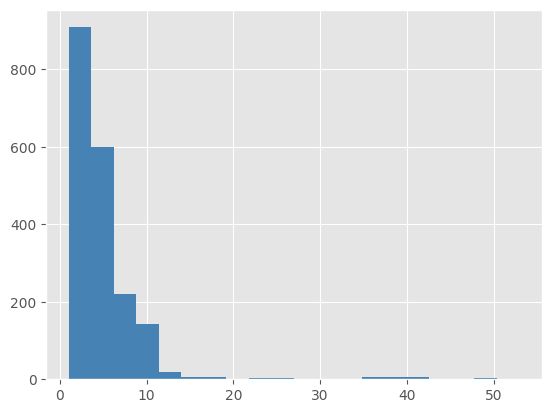

In [60]:
tokens_len = [len(token) for token in tokens]

plt.hist(tokens_len, bins = 20, color = 'steelblue')
plt.show()

In [83]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS
# Initialize the CountVectorizer

stopwords = list(STOPWORDS)  # Convert STOPWORDS set to a list
stopwords.extend(["t", "co", "https", "amp", "U", "fuck", "fucking"]) 
count_vect = CountVectorizer(stop_words=stopwords)

# Fit and transform the text data
X_counts = count_vect.fit_transform(df['body'])

# Get the feature names
feature_names = count_vect.get_feature_names_out()

# Print the first 10 feature names
print(feature_names[:1000])

['00' '000' '00038' '000s' '00110' '00210' '00341' '005' '00650' '00743'
 '00pm' '01' '01118' '01135v1' '01207'
 '014c5cfba1b905b07d83c82e5f449199382dad67' '01578' '01956v1' '02' '020'
 '02037' '0214' '02389' '02442' '02651' '02757' '02916' '02942'
 '02e56b776a338cbf78efce41432d559a3809fbf1' '03' '03109' '033' '03426'
 '03697' '03841' '03897' '04' '04007' '04133' '04352' '04375' '04767' '05'
 '05115' '05266' '05651' '058' '05826' '05909' '05913' '05933' '06'
 '06176' '06377' '06413' '06443' '07161' '07178' '07641' '07754' '07875'
 '07910' '07jibjjvnp8' '08' '08176' '08207' '08671' '08890'
 '08mxiqzvkcz71' '09' '09197' '092' '09410' '09788' '09841'
 '0bc411b70a9ab0437d564dfd81034fd2d528a5f1'
 '0c4a56734b0b8ced065014ee9bc425578dd2718d'
 '0c9640ab881044980943489fb6db703888126170' '0dlwqqlmqv' '0m2zos4zjry71'
 '0st2' '0zt6443kofv71' '10' '100' '1000' '1000chf' '1000s' '100k' '100ms'
 '100s' '100tb' '101' '1016' '102' '1024' '103' '10319' '104' '105' '106'
 '1060' '107' '10756' '108' '1080'

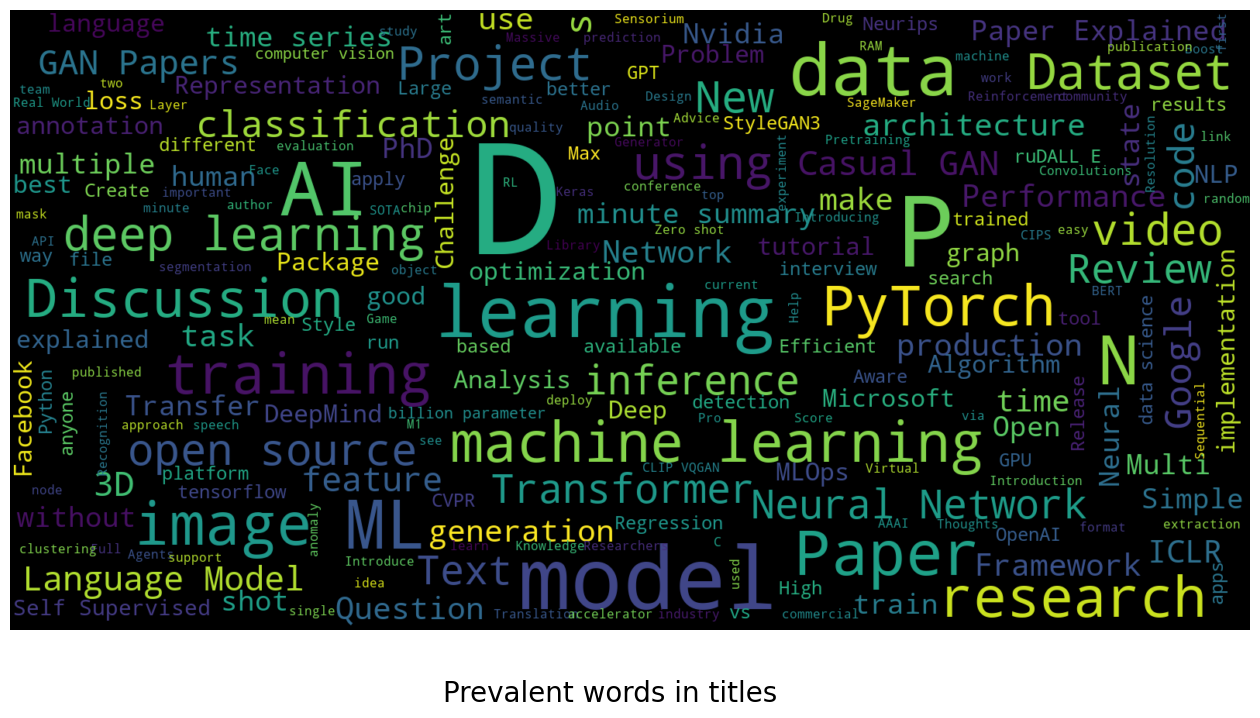

In [86]:
def show_wordcloud(data, title=""):
    text = " ".join(t for t in data.dropna())
    stopwords = set(STOPWORDS)
    stopwords.update(["t", "co", "https", "amp", "U", "fuck", "fucking"])
    wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500,background_color="black").generate(text)
    fig = plt.figure(1, figsize=(16,16))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

show_wordcloud(df['title'], title = 'Prevalent words in titles')

In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words="english", max_df = 0.7)

tfidf = tfidf_vectorizer.fit_transform(df['body'])

print(print(tfidf.A[:5]))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
None
